# 🏢 Financial Distress Prediction
## Bankruptcy Prediction using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

In [5]:
Distress_data = pd.read_csv("Financial Distress.csv")
Distress_data

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,...,100.000,100.00,100.000,17.125,14.5,-7.0,37,0.436380,4,41
3668,422,11,0.482410,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,...,91.500,130.50,132.400,20.000,14.5,-16.0,37,0.438020,5,42
3669,422,12,0.500770,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,...,87.100,175.90,178.100,20.000,14.5,-20.2,37,0.482410,6,43
3670,422,13,0.611030,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,...,92.900,203.20,204.500,22.000,22.0,6.4,37,0.500770,7,44


### Data Exploration and Understanding:

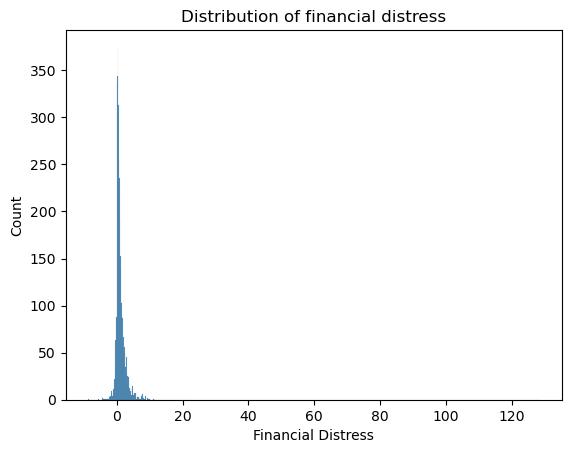

In [12]:
#Examining the distributipon of the target variable "Financial distress"
sns.histplot(x='Financial Distress', data=Distress_data)
plt.title('Distribution of financial distress')
plt.show()



In [13]:
# Understanding the characteristics and distributions of the features
feature_statistics = Distress_data.describe()

# Display the feature statistics
print("Feature Statistics:")
print(feature_statistics)


Feature Statistics:
           Company         Time  Financial Distress           x1           x2  \
count  3672.000000  3672.000000         3672.000000  3672.000000  3672.000000   
mean    182.084423     7.528322            1.040257     1.387820     0.129706   
std     117.024636     4.064016            2.652227     1.452926     0.120013   
min       1.000000     1.000000           -8.631700     0.075170    -0.258080   
25%      80.000000     4.000000            0.172275     0.952145     0.048701   
50%     168.000000     7.000000            0.583805     1.183600     0.107530   
75%     264.250000    11.000000            1.351750     1.506475     0.188685   
max     422.000000    14.000000          128.400000    51.954000     0.749410   

                x3            x4           x5           x6           x7  ...  \
count  3672.000000  3.672000e+03  3672.000000  3672.000000  3672.000000  ...   
mean      0.615769  8.681599e-01     0.154949     0.106717     0.784031  ...   
std       

The majority of the data is centered around 0, but there are outliers, evident from the df.describe() method. While the mean is 1.04, the maximum value reaches 128.4. Since the data is modelled using a Bernoulli distribution and will be binarized, outliers aren't problematic. However, normalization may be preferred before applying it to a Linear Regression model. Our binarization follows a rule: if the value is smaller than -0.5, it indicates financial distress; otherwise, it does not. The apply method can be used for this binarization process.

In [14]:
def determineDistressStatus(x):
    """
    Returns 1 if x is less than -0.5; otherwise, returns 0. 
    1 corresponds to Financial Distress, while 0 signifies Financial Health.
    """
    return 1 if x < -0.5 else 0


In [19]:
Distress_data["target"] = Distress_data["Financial Distress"].apply(
    determineDistressStatus)

df_subset = Distress_data[["Company", "Time", "Financial Distress",
                           "target"]].head()
df_subset

,Company,Time,Financial Distress,target
0,1,1,0.010636,0
1,1,2,-0.455970,0
2,1,3,-0.325390,0
3,1,4,-0.566570,1
4,2,1,1.357300,0


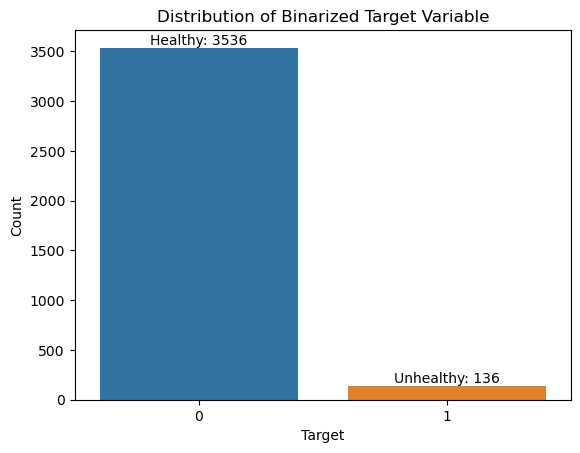

In [23]:
sns.countplot(x='target', data=Distress_data)
plt.title('Distribution of Binarized Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')

# Add labels to the bars
bar_labels = ['Healthy', 'Unhealthy']
for i, label in enumerate(bar_labels):
    plt.text(i,
             Distress_data['target'].value_counts()[i],
             f'{label}: {Distress_data["target"].value_counts()[i]}',
             ha='center',
             va='bottom')

plt.show()


The histogram depicted above indicates a significantly higher frequency of occurrences for financially healthy companies compared to those experiencing financial distress. This imbalance in the dataset is suboptimal. In technical terms, we describe our dataset as being imbalanced. To address this issue, common strategies include oversampling and undersampling. Oversampling involves augmenting the number of samples in the minority class, while undersampling involves reducing the number of samples in the majority class.

### Data Preprocessing:

In [9]:
print(f"Columns with NaN values: {Distress_data.columns[Distress_data.isna().any()].to_list()}")

Columns with NaN values: []


In [11]:
print(f"Number  of duplicated rows: {Distress_data.duplicated().sum()}")

Number  of duplicated rows: 0
